In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('student_performance_dataset.csv')
df

,Study_hours,Attendance_percent,Sleep_hours,Game_hours,Anxiety_score,Exam_score
0,6,57,5,4,3,42.0
1,19,76,8,0,6,144.0
2,14,58,9,3,7,98.0
3,10,86,4,4,3,75.0
4,7,82,7,9,7,60.0
...,...,...,...,...,...,...
145,12,87,8,6,1,99.0
146,8,94,9,8,4,81.0
147,2,57,4,3,8,44.0
148,6,76,8,3,5,70.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
X = df.drop('Exam_score', axis=1)
y = df['Exam_score']

In [8]:
num_feat = ['Study_hours','Attendance_percent']
cat_feat = ['Sleep_hours', 'Game_hours', 'Anxiety_score']

In [9]:
num_trans = StandardScaler()
cat_trans = OneHotEncoder(handle_unknown='ignore')

In [10]:
preprop = ColumnTransformer(
    transformers=[
        ('num', num_trans, num_feat),
        ('cat', cat_feat, cat_trans)
    ]
)

In [14]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
pipe.fit(X_train, y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [ ]:
# Eval
y_pred=pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 113.82563702487856
R² Score: 0.8359640532470094


Text(0.5, 1.0, 'Actual vs Predicted Exam Scores')

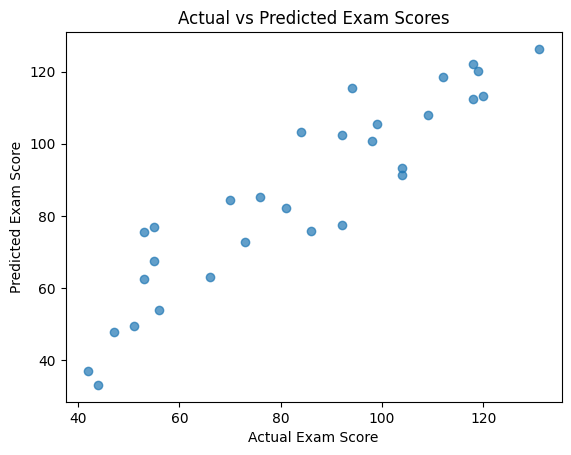

In [19]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")